# ***Import Libraries & Load Data***

In [2]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load your CSV data
df = pd.read_csv('/content/Cutomer_churn_analysis.csv')

# View the first few rows
df.head()

,Customer ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Unnamed: 8,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# ***Understand the Dataset***

In [6]:
# Check column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   Unnamed: 8        7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check for missing values
df.isnull().sum()

,0
Customer ID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Unnamed: 8,0
OnlineSecurity,0


In [8]:
# Basic statistics
df.describe(include = 'all')

,Customer ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Unnamed: 8,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# ***Data Cleaning***

In [9]:
# Drop unnecessary columns
df.drop(columns=["Customer ID","Unnamed: 8"], inplace = True, errors = 'ignore')

In [10]:
# Convert 'TotalCharges' to numric (handle empty strings)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

In [11]:
# Convert target 'Churn' to binary
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# ***Feature Engineering & Encoding***

In [12]:
# Identify Categorical columns
categorical_cols = df.select_dtypes(include = 'object').columns.tolist()

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns = categorical_cols, drop_first = True)

# ***Train-Test Split & Model Building***

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [21]:
# Define X and y
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values with median (to avoid ValueError)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8197303051809794
Confusion Matrix:
 [[931 105]
 [149 224]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# ***Model Explainability using ELI5***

In [23]:
# Install ELI5
!pip install eli5
import eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.5 MB/s eta 0:00:00


# ***Use ELI5 to Show Feature Importance***

In [24]:
from eli5.sklearn import explain_weights

# Show the top features influencing churn (positive = increase churn, negative = reduce churn)
eli5.show_weights(model, feature_names=X.columns.tolist())

# ***Customer Segmentation***

### ***Add Churn Probability to DataFrame***

In [27]:
# Fill missing values in X before predict_proba
X = X.fillna(X.median())


# Predict probabilities for all rows
df_encoded["Churn_Prob"] = model.predict_proba(X)[:, 1]

# Add back original features needed for logic (tenure, contract)
df_encoded["tenure"] = df["tenure"]
df_encoded["Contract"] = df["Contract"]


### ***Apply Segmentation Logic***

In [28]:
def segment_customer(row):
    if row["Churn_Prob"] > 0.6 and row["tenure"] > 3:
        return "At Risk"
    elif row["tenure"] <= 3:
        return "Dormant"
    else:
        return "Loyal"

df_encoded["Segment"] = df_encoded.apply(segment_customer, axis=1)


### ***View Segment Distribution***

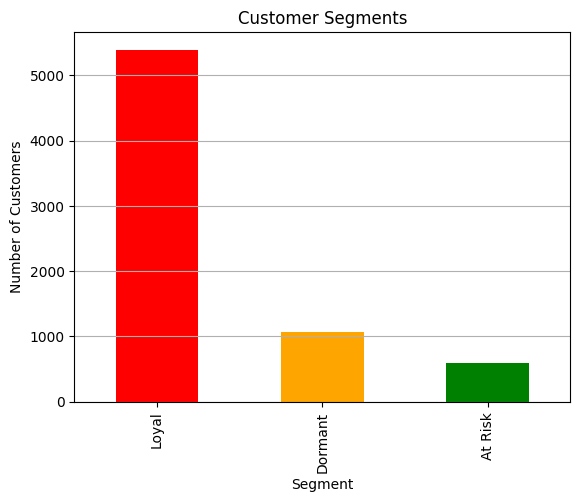

In [29]:
df_encoded["Segment"].value_counts().plot(kind='bar', title="Customer Segments", color=["red", "orange", "green"])
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.grid(axis='y')
plt.show()


# ***Final Insights, Business Recommendations & Reporting***

### *** Segment Summary***

In [30]:
segment_counts = df_encoded["Segment"].value_counts()
segment_percent = (segment_counts / segment_counts.sum()) * 100

print("Customer Segments (%):")
print(segment_percent.round(2))


Customer Segments (%):
Segment
Loyal      76.59
Dormant    15.08
At Risk     8.33
Name: count, dtype: float64
